# Experimenting with Text to Image Generation

In this notebook, we'll experiment with generative AI using a text-to-image model called stable diffusion.  We'll be using an open source [model](https://huggingface.co/stabilityai/stable-diffusion-2-1-base) from [Huggingface](huggingface.co)

## Setup

### Check GPU

While we can run these notebooks without a GPU, it'll be much faster with one.  Let's check to make sure we have a GPU and how much memory we have available.

In [1]:
!nvidia-smi --query-gpu=name,memory.total,memory.free --format=csv,noheader

Tesla T4, 15360 MiB, 14914 MiB


### Install Libraries

We need some libraries to run the diffusion pipeline.  The most important is the [Huggingface Diffusers library](https://huggingface.co/docs/diffusers/index).

In [2]:
!pip install -q git+https://github.com/huggingface/diffusers
!pip install -q --upgrade diffusers accelerate transformers


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Load the Pre-Trained Model

We can load a pre-trained model directly from Huggingface.  Here we're specifying [stabilityai/stable-diffusion-2-1-base](stabilityai/stable-diffusion-2-1-base), but we could also have used any number of models including [runwayml/stable-diffusion-v1-5](https://huggingface.co/runwayml/stable-diffusion-v1-5) or [CompVis/stable-diffusion-v1-4](https://huggingface.co/CompVis/stable-diffusion-v1-4)

```
DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base")
```

In [3]:
import torch
from diffusers import DiffusionPipeline

# load the model from Huggingface https://huggingface.co/stabilityai/stable-diffusion-2-1-base
pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base")

# You could also load local weights:
# pipeline = DiffusionPipeline.from_pretrained("./notebook-output/stable_diffusion_weights/redhat-dog")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipeline.to(device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.28.0.dev0",
  "_name_or_path": "stabilityai/stable-diffusion-2-1-base",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Sample Inference

### An Airplane

  0%|          | 0/50 [00:00<?, ?it/s]

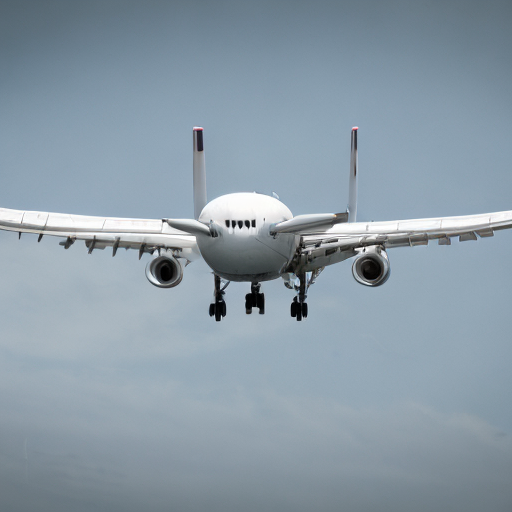

In [4]:
image = pipeline("a photo of an airplane").images[0]
image

### Our Airplane

This is the airplane we need to generate pictures of:

![Airplane](https://rhods-public.s3.amazonaws.com/sample-data/images/wright-flyer-small.jpg)

Let's try and generate a picture of it.

  0%|          | 0/50 [00:00<?, ?it/s]

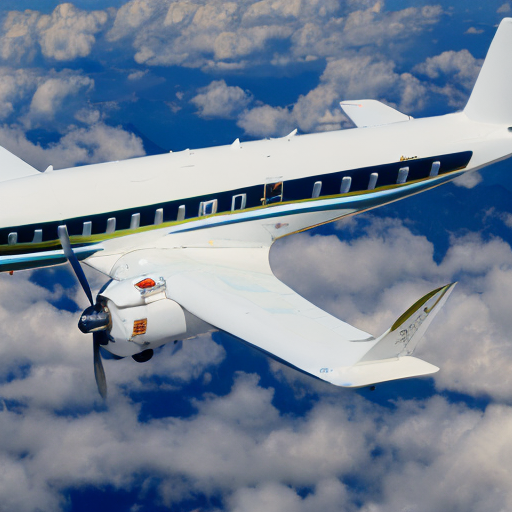

In [5]:
image = pipeline("a photo of a awrtflyr airplane").images[0]
image

### Not the right airplane

As you can tell, we generated a picture of an airplane, but it wasn't the airplane we wanted.

The word `awrtflyr`, means nothing to the model, or to you, either.  In order to teach the model about our newly designed aircraft, I'll have to fine tune it

[Notebook 2 - Fine Tuning](2_fine_tuning_custom.ipynb)


### Cleanup

In [6]:
import gc
import torch


try:
    del image
except NameError:
    print("image already deleted")
    
try:
    del pipeline
except NameError:
    print("pipeline already deleted")
try:
    del device
except NameError:
    print("device already deleted")
    
gc.collect()
torch.cuda.empty_cache()
